In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score
import matplotlib.pyplot as plt

In [2]:
# Load the iris dataset from sklearn
iris = load_iris()

In [3]:
# Print dataset description 
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
# Display the raw data
print(f"Data:{iris.data}")  # Feature data
print(f"Target Label:{iris.target}")  # Target labels
print(f"Names:{iris.feature_names}")  # Feature names

Data:[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3

In [6]:
# Create a pandas DataFrame from the dataset
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df.head(5)  # View the first 5 rows

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [7]:
# Add the target labels to the DataFrame
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
# View the unique class labels (0, 1, 2)
df['target'].unique()

array([0, 1, 2])

In [9]:
# Print the actual class names
print(iris.target_names)

['setosa' 'versicolor' 'virginica']


In [10]:
# Create separate DataFrames for each iris class for plotting
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

In [11]:
# view dataframe df0
df0.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [12]:
# Add a new column with the actual flower names instead of numeric target
df['flower_name'] = df.target.apply(lambda x: iris.target_names[x])
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


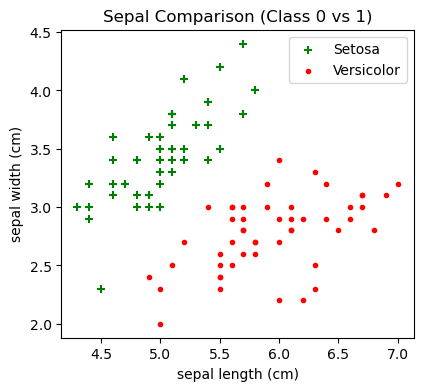

In [13]:
# Plot: Sepal Length vs Sepal Width for class 0 and 1
%matplotlib inline
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.xlabel('sepal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title("Sepal Comparison (Class 0 vs 1)")
plt.scatter(df0['sepal length (cm)'], df0['sepal width (cm)'], color='green', marker='+', label='Setosa')
plt.scatter(df1['sepal length (cm)'], df1['sepal width (cm)'], color='red', marker='.', label='Versicolor')
plt.legend()

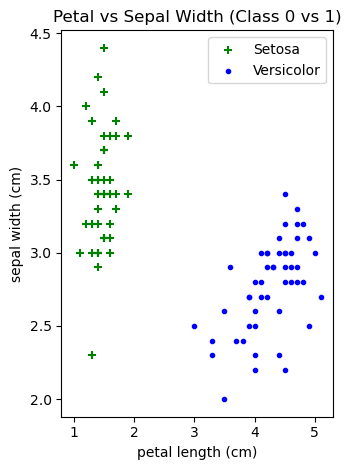

In [14]:
# Plot: Petal Length vs Sepal Width for class 0 and 1
plt.subplot(1, 2, 2)
plt.xlabel('petal length (cm)')
plt.ylabel('sepal width (cm)')
plt.title("Petal vs Sepal Width (Class 0 vs 1)")
plt.scatter(df0['petal length (cm)'], df0['sepal width (cm)'], color='green', marker='+', label='Setosa')
plt.scatter(df1['petal length (cm)'], df1['sepal width (cm)'], color='blue', marker='.', label='Versicolor')
plt.legend()
plt.tight_layout()
plt.show()

In [15]:
# Prepare the features and labels
x = df.drop(['target', 'flower_name'], axis='columns')  # Features
y = df.target  # Target labels

In [16]:
# Split the dataset into training and test sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
# Train a Decision Tree Classifier
model = DecisionTreeClassifier()
model.fit(x_train, y_train)

DecisionTreeClassifier()

In [18]:
# Make predictions on test data
y_pred = model.predict(x_test)

In [19]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')  # macro for multi-class
recall = recall_score(y_test, y_pred, average='macro')

In [20]:
# Print evaluation metrics
print("Model Evaluation Metrics:")
print(f"Accuracy : {accuracy:.2f}")
print(f"Precision: {precision:.2f}")
print(f"Recall   : {recall:.2f}")

Model Evaluation Metrics:
Accuracy : 1.00
Precision: 1.00
Recall   : 1.00
